# 01 Data Overview

In [1]:
import pandas as pd, numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
pd.set_option("display.max_columns", 120)


In [2]:
# load data
data_dir = Path("../data/")

tran = pd.read_csv(data_dir / "dcpc_2024_tranlevel_public.csv", low_memory=False)
day  = pd.read_csv(data_dir / "dcpc_2024_daylevel_public.csv", low_memory=False)
ind  = pd.read_csv(data_dir / "dcpc_2024_indlevel_public.csv", low_memory=False)

print("Shapes:")
print("  tran:", tran.shape)
print("  day :", day.shape)
print("  ind :", ind.shape)

print("\nColumn names:")
print("TRAN columns:", tran.columns.tolist())
print("\nDAY columns:", day.columns.tolist())
print("\nIND columns:", ind.columns.tolist())


Shapes:
  tran: (32267, 67)
  day : (22332, 86)
  ind : (5583, 292)

Column names:
TRAN columns: ['id', 'old_diary_day', 'date', 'tran', 'tran_report', 'amnt_orig', 'payamnt_erramnt', 'pi', 'amnt', 'amnt_flag', 'merch', 'cc_surcharge', 'q101ee', 'device', 'time', 'in_person', 'diary_day', 'mobile_method', 'authorization_method', 'pay010', 'pay011', 'pay082', 'p2p_type', 'p2p_business', 'ccbaldue', 'enough_cash', 'accept_cash', 'accept_card', 'dc_rewards', 'used_rewards_cc', 'used_revolve_cc', 'cc_discount', 'prepaid_logo', 'mobile_funding', 'mobile_app', 'monord_source', 'monord_date', 'why_multipi', 'billautom', 'bill', 'payee', 'multipi_breakdown', 'discount', 'tran_min', 'paylocaltime', 'payment', 'module', 'start_date', 'nonpaymenttran', 'cashdepmethod', 'cashdeptime', 'cashdepaccount', 'chkdepfunds', 'cashgetlocation', 'cashgetsource', 'cashgetfee', 'cashgettime', 'chktransferaccount', 'chktransferfee', 'chktransferwhenrec', 'chktransferinstitution', 'q211paymeth', 'uncommon_pi_ty

In [3]:
def null_rate(df, top=20):
    return (df.isna().mean().sort_values(ascending=False)
            .head(top).rename("null_rate"))

# Investigate null columns
print("Top null-rate columns (TRAN):")
print(null_rate(tran).to_string())

Top null-rate columns (TRAN):
q211paymeth               0.999008
uncommon_pi_type          0.999008
monord_date               0.998667
monord_source             0.998667
prepaidloadfee            0.997583
prepaidloadlocation       0.997490
prepaidloadmethod         0.997490
multipi_breakdown         0.996095
why_multipi               0.996064
p2p_business              0.992624
cashdepmethod             0.992004
cashdeptime               0.991973
cashdepaccount            0.991973
chktransferwhenrec        0.986364
chktransferinstitution    0.986209
chktransferfee            0.985930
chktransferaccount        0.985682
pay011                    0.983668
amnt_flag                 0.981963
payamnt_erramnt           0.981870


In [4]:
print("\nTop null-rate columns (DAY):")
print(null_rate(day).to_string())



Top null-rate columns (DAY):
inc_method_alimony           1.000000
inc_amnt_alimony             1.000000
inc_amnt_childsupport        0.998567
inc_method_childsupport      0.998567
inc_method_otherretire       0.997940
inc_amnt_otherretire         0.997806
inc_amnt_rental              0.997313
inc_method_rental            0.997313
inc_method_empretire         0.993955
inc_amnt_empretire           0.993955
inc_method_interest          0.993238
inc_amnt_interest            0.993149
inc_method_govtasst          0.991223
inc_amnt_govtasst            0.991089
inc_amnt_selfemployment      0.986522
inc_method_selfemployment    0.986477
inc_method_socsec            0.984775
inc_amnt_socsec              0.984686
num_times_used_coins         0.974655
pay_amnt_coins               0.974655


In [5]:
print("\nTop null-rate columns (IND):")
print(null_rate(ind).to_string())



Top null-rate columns (IND):
agerange                     0.998746
inc_howoften_alimony         0.998567
pa055_a2_followup            0.988178
underbanked_remittance       0.985313
inc_howoften_childsupport    0.974745
pa042_e                      0.970804
pa002                        0.950206
pa003                        0.950206
underbanked_monord           0.947698
inc_howoften_rental          0.943937
crypto_value                 0.927458
which_crypto_eth             0.926742
which_crypto_bitcoin         0.926742
which_crypto_doge            0.926742
which_crypto_lite            0.926742
which_crypto_other           0.926742
pa133_b                      0.926742
pa133_a                      0.926742
pa050_crypto                 0.926563
pa133_c                      0.926563


In [6]:
# Guess ID/DATE/AMT columns
def pick(df, opts):
    for c in opts:
        if c in df.columns: return c
    return None

ID_COLS  = ["_id","id","person_id","PID"]
DATE_COL = ["_date","date"]
AMT_COL  = ["_amount","amount","amnt"]

t_id   = pick(tran, ID_COLS);  d_id   = pick(day, ID_COLS);  i_id = pick(ind, ID_COLS)
t_date = pick(tran, DATE_COL); d_date = pick(day, DATE_COL)

print("Guessed columns:")
print("  tran:", t_id, t_date, pick(tran, AMT_COL))
print("  day :", d_id, d_date, pick(day, AMT_COL))
print("  ind :", i_id)


Guessed columns:
  tran: id date amnt
  day : id date None
  ind : id


In [7]:
# Convert date columns
if t_date: tran[t_date] = pd.to_datetime(tran[t_date], errors="coerce")
if d_date: day[d_date]  = pd.to_datetime(day[d_date],  errors="coerce")

# Unique persons count
n_person_tran = tran[t_id].nunique() if t_id else None
n_person_day  = day[d_id].nunique() if d_id else None
n_person_ind  = ind[i_id].nunique() if i_id else None
print("\nUnique persons — tran/day/ind:", n_person_tran, n_person_day, n_person_ind)
if i_id and d_id:
    print("day ⊆ ind ?", day[d_id].isin(ind[i_id]).all())

# Count effective days per person
if d_id and d_date:
    per_days = day.groupby(d_id)[d_date].nunique().rename("n_days")
    print("\nPer-person #days describe:")
    print(per_days.describe())


Unique persons — tran/day/ind: 5127 5583 5583
day ⊆ ind ? True

Per-person #days describe:
count    5583.0
mean        4.0
std         0.0
min         4.0
25%         4.0
50%         4.0
75%         4.0
max         4.0
Name: n_days, dtype: float64


The results suggests that there is no deviation in each individual's number of effective days. Each person has 4 days recorded in the DAY table.

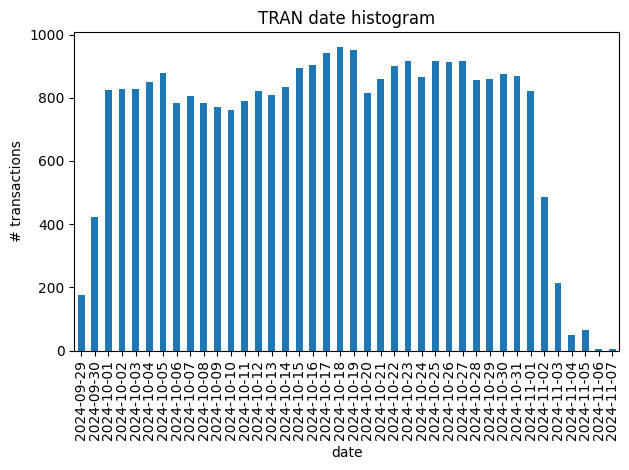

In [8]:
# Plot date histograms
if t_date:
    plt.figure()
    tran[t_date].dt.date.value_counts().sort_index().plot(kind="bar")
    plt.title("TRAN date histogram")
    plt.xlabel("date"); plt.ylabel("# transactions")
    plt.tight_layout(); plt.show()

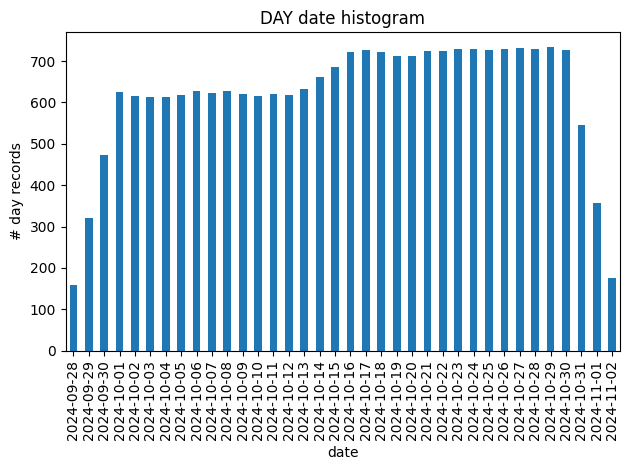

In [9]:
if d_date:
    plt.figure()
    day[d_date].dt.date.value_counts().sort_index().plot(kind="bar")
    plt.title("DAY date histogram")
    plt.xlabel("date"); plt.ylabel("# day records")
    plt.tight_layout(); plt.show()


In [10]:
# Check duplicate rows at person-date level
dup = 0
if d_id and d_date:
    dup = day.duplicated(subset=[d_id, d_date]).sum()
print("Duplicate person-day rows in DAY:", dup)


Duplicate person-day rows in DAY: 0


In [11]:
# Check amount column in TRAN
a_col = pick(tran, ["_amount","amount","amnt"])
if a_col:
    amt = pd.to_numeric(tran[a_col], errors="coerce")
    print("Amount describe (TRAN):")
    print(amt.describe())


Amount describe (TRAN):
count    32267.000000
mean       234.809685
std       1087.309032
min       -100.000000
25%         13.590000
50%         35.000000
75%        103.300000
max      63521.000000
Name: amnt, dtype: float64


In [12]:
# Check categorical columns in TRAN
for c in ["payment","nonpaymenttran"]:
    if c in tran.columns:
        print(f"Value counts for {c} (TRAN):")
        print(tran[c].value_counts(dropna=False))


Value counts for payment (TRAN):
payment
1    28810
0     3457
Name: count, dtype: int64
Value counts for nonpaymenttran (TRAN):
nonpaymenttran
NaN    28810
1.0     2993
2.0      361
3.0       69
4.0       23
5.0       11
Name: count, dtype: int64
